### Pogba or Modric? - Plotting shot assists

Below codes cover how I created the World Cup 2018 shot assist action plots for Paul Pogba and Luka Modric. The main idea was that Paul Pogba was a more effective player in the offense, but in general France could not get the best out of him as he was tasked to play as a deep lying playmaker. To visualize my hypothesis, I compared the xGs created by Pogba's and Modric's shot assists (expected goal chance created by the shot assist. Includes goal assists. In probability terms.). The plots show that Paul Pogba created less chances compared to Modric as he was play away from the opponents' keep. But the quality, measured by the xG that the shot assist creates, of the shot assists made by Pogba is noticeably higher. The code below shows how I merged the xGs with shot assists and plotted them onto a football field. Dataset is gathered from Statbomb's open source github page: https://github.com/statsbomb/open-data. To draw the football field, I used FCPython's createPitch() function https://fcpython.com/visualisation/drawing-pitchmap-adding-lines-circles-matplotlib.

#### Essentials first.

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.json import json_normalize
import pandas as pd
import os
from FCPython import createPitch
import matplotlib.font_manager
from IPython.core.display import HTML
from collections import OrderedDict

From Statbomb's competition.json file, the tournament id and corresponding games' ids can be found. Below are the ones for Crotatia (match_id_required_l) and France (match_id_required_p). All opened and converted into dataframes. Initially we will do this for Croatia's games to create the plot for Luka Modric. Then, the process will be iterated to create Pogba's. 

In [ ]:
match_id_required_l = ['7581', '7529', '8652', '7545', '8658', '7561', '8656'] 
match_id_required_p = ['7530', '7546', '7580', '8649', '8658', '7563', '8655']

file_name_l = [] 
for i in match_id_required_l: 
    j=str(i)+'.json' 
    file_name_l.append(j)

file_name_p = [] 
for i in match_id_required_p: 
    j=str(i)+'.json' 
    file_name_p.append(j)

with open('YOUR/PATH/TO/DIR'+file_name_l[0], errors='ignore') as f:
    data0= json.load(f)
with open('YOUR/PATH/TO/DIR'+file_name_l[1], errors='ignore') as f:
    data1= json.load(f)
with open('YOUR/PATH/TO/DIR'+file_name_l[2], errors='ignore') as f:
    data2= json.load(f)
with open('YOUR/PATH/TO/DIR'+file_name_l[3], errors='ignore') as f:
    data3= json.load(f)
with open('YOUR/PATH/TO/DIR'+file_name_l[4], errors='ignore') as f:
    data4= json.load(f)
with open('YOUR/PATH/TO/DIR'+file_name_l[5], errors='ignore') as f:
    data5= json.load(f)    
with open('YOUR/PATH/TO/DIR'+file_name_l[6], errors='ignore') as f:
    data6= json.load(f)    
    
df0 = json_normalize(data0, sep = "_").assign(match_id = file_name_l[0][:-5])
df1 = json_normalize(data1, sep = "_").assign(match_id = file_name_l[1][:-5])
df2 = json_normalize(data2, sep = "_").assign(match_id = file_name_l[2][:-5])
df3 = json_normalize(data3, sep = "_").assign(match_id = file_name_l[3][:-5])
df4 = json_normalize(data4, sep = "_").assign(match_id = file_name_l[4][:-5])
df5 = json_normalize(data5, sep = "_").assign(match_id = file_name_l[5][:-5])
df6 = json_normalize(data6, sep = "_").assign(match_id = file_name_l[6][:-5])

One can figure out that each shot assist has an id, which corresponds to the main id of the shot itself. This causes xGs of shots and their assists are treated as attributes of different observations, therefore kept in different rows. Below code first reduces the entire event data for each game to shot assists occurred in each game. Then it merges the main shot assist data with the dataframe that contains xGs, by unifying the ids on the same row. 

In [ ]:
df0['shot_goal_assist'] = df0["pass_assisted_shot_id"].apply(lambda x: 0 if pd.isnull(x) else 1)
df1['shot_goal_assist'] = df1["pass_assisted_shot_id"].apply(lambda x: 0 if pd.isnull(x) else 1)
df2['shot_goal_assist'] = df2["pass_assisted_shot_id"].apply(lambda x: 0 if pd.isnull(x) else 1)
df3['shot_goal_assist'] = df3["pass_assisted_shot_id"].apply(lambda x: 0 if pd.isnull(x) else 1)
df4['shot_goal_assist'] = df4["pass_assisted_shot_id"].apply(lambda x: 0 if pd.isnull(x) else 1)
df5['shot_goal_assist'] = df5["pass_assisted_shot_id"].apply(lambda x: 0 if pd.isnull(x) else 1)
df6['shot_goal_assist'] = df6["pass_assisted_shot_id"].apply(lambda x: 0 if pd.isnull(x) else 1)

df00 = df0.loc[(df0['shot_goal_assist'] == 1)].drop(columns=['id'])
df11 = df1.loc[(df1['shot_goal_assist'] == 1)].drop(columns=['id'])
df22 = df2.loc[(df2['shot_goal_assist'] == 1)].drop(columns=['id'])
df33 = df3.loc[(df3['shot_goal_assist'] == 1)].drop(columns=['id'])
df44 = df4.loc[(df4['shot_goal_assist'] == 1)].drop(columns=['id'])
df55 = df5.loc[(df5['shot_goal_assist'] == 1)].drop(columns=['id'])
df66 = df6.loc[(df6['shot_goal_assist'] == 1)].drop(columns=['id'])

df00 = df00.rename(columns={'pass_assisted_shot_id': 'id'})
df11 = df11.rename(columns={'pass_assisted_shot_id': 'id'})
df22 = df22.rename(columns={'pass_assisted_shot_id': 'id'})
df33 = df33.rename(columns={'pass_assisted_shot_id': 'id'})
df44 = df44.rename(columns={'pass_assisted_shot_id': 'id'})
df55 = df55.rename(columns={'pass_assisted_shot_id': 'id'})
df66 = df66.rename(columns={'pass_assisted_shot_id': 'id'})

df00 = df00.drop(columns=['shot_statsbomb_xg', 'shot_outcome_name'])
df11 = df11.drop(columns=['shot_statsbomb_xg', 'shot_outcome_name'])
df22 = df22.drop(columns=['shot_statsbomb_xg', 'shot_outcome_name'])
df33 = df33.drop(columns=['shot_statsbomb_xg', 'shot_outcome_name'])
df44 = df44.drop(columns=['shot_statsbomb_xg', 'shot_outcome_name'])
df55 = df55.drop(columns=['shot_statsbomb_xg', 'shot_outcome_name'])
df66 = df66.drop(columns=['shot_statsbomb_xg', 'shot_outcome_name'])

df0 = df0.set_index('id')
df1 = df1.set_index('id')
df2 = df2.set_index('id')
df3 = df3.set_index('id')
df4 = df4.set_index('id')
df5 = df5.set_index('id')
df6 = df6.set_index('id')

df000 = df0[['shot_statsbomb_xg', 'shot_outcome_name']].reset_index()
df111 = df1[['shot_statsbomb_xg', 'shot_outcome_name']].reset_index()
df222 = df2[['shot_statsbomb_xg', 'shot_outcome_name']].reset_index()
df333 = df3[['shot_statsbomb_xg', 'shot_outcome_name']].reset_index()
df444 = df4[['shot_statsbomb_xg', 'shot_outcome_name']].reset_index()
df555 = df5[['shot_statsbomb_xg', 'shot_outcome_name']].reset_index()
df666 = df6[['shot_statsbomb_xg', 'shot_outcome_name']].reset_index()

df000 = df000.dropna()
df111 = df111.dropna()
df222 = df222.dropna()
df333 = df333.dropna()
df444 = df444.dropna()
df555 = df555.dropna()
df666 = df666.dropna()

df0_f = df00.merge(df000, how='left', on=['id'])
df1_f = df11.merge(df111, how='left', on=['id'])
df2_f = df22.merge(df222, how='left', on=['id'])
df3_f = df33.merge(df333, how='left', on=['id'])
df4_f = df44.merge(df444, how='left', on=['id'])
df5_f = df55.merge(df555, how='left', on=['id'])
df6_f = df66.merge(df666, how='left', on=['id']) 

Then, the dataset that we formed for each game is reduced to the actions taken by Luka Modric only. Finally, all shot assists made by Luka Modric during each Croatia game of the World Cup 2018 can be merged in one dataframe.

In [ ]:
df0_f = df0_f.loc[(df0_f['player_name'] == 'Luka ModriÄ‡')].copy()
df1_f = df1_f.loc[(df1_f['player_name'] == 'Luka ModriÄ‡')].copy()
df2_f = df2_f.loc[(df2_f['player_name'] == 'Luka ModriÄ‡')].copy()
df3_f = df3_f.loc[(df3_f['player_name'] == 'Luka ModriÄ‡')].copy()
df4_f = df4_f.loc[(df4_f['player_name'] == 'Luka ModriÄ‡')].copy()
df5_f = df5_f.loc[(df5_f['player_name'] == 'Luka ModriÄ‡')].copy()
df6_f = df6_f.loc[(df6_f['player_name'] == 'Luka ModriÄ‡')].copy()

df0_f['player_name']= df0_f['player_name'].replace('Luka ModriÄ‡', "Luka Modric") 
df1_f['player_name']= df1_f['player_name'].replace('Luka ModriÄ‡', "Luka Modric") 
df2_f['player_name']= df2_f['player_name'].replace('Luka ModriÄ‡', "Luka Modric") 
df3_f['player_name']= df3_f['player_name'].replace('Luka ModriÄ‡', "Luka Modric") 
df4_f['player_name']= df4_f['player_name'].replace('Luka ModriÄ‡', "Luka Modric") 
df5_f['player_name']= df5_f['player_name'].replace('Luka ModriÄ‡', "Luka Modric") 
df6_f['player_name']= df6_f['player_name'].replace('Luka ModriÄ‡', "Luka Modric") 

dfmerge1 = df0_f.append(df1_f)
dfmerge2 = dfmerge1.append(df2_f)
dfmerge3 = dfmerge2.append(df3_f)
dfmerge4 = dfmerge3.append(df4_f)
dfmerge5 = dfmerge4.append(df5_f)
dfluka = dfmerge5.append(df6_f)

dfluka = dfluka.set_index('id')

The below codes creates the shot assist plot for Luka Modric. Color-coded in terms of shot source and the outcome (Set Pieces, regular play or whether the outcome is a goal or not.). The larger the circle, the higher the xG that the shot pass creates. 
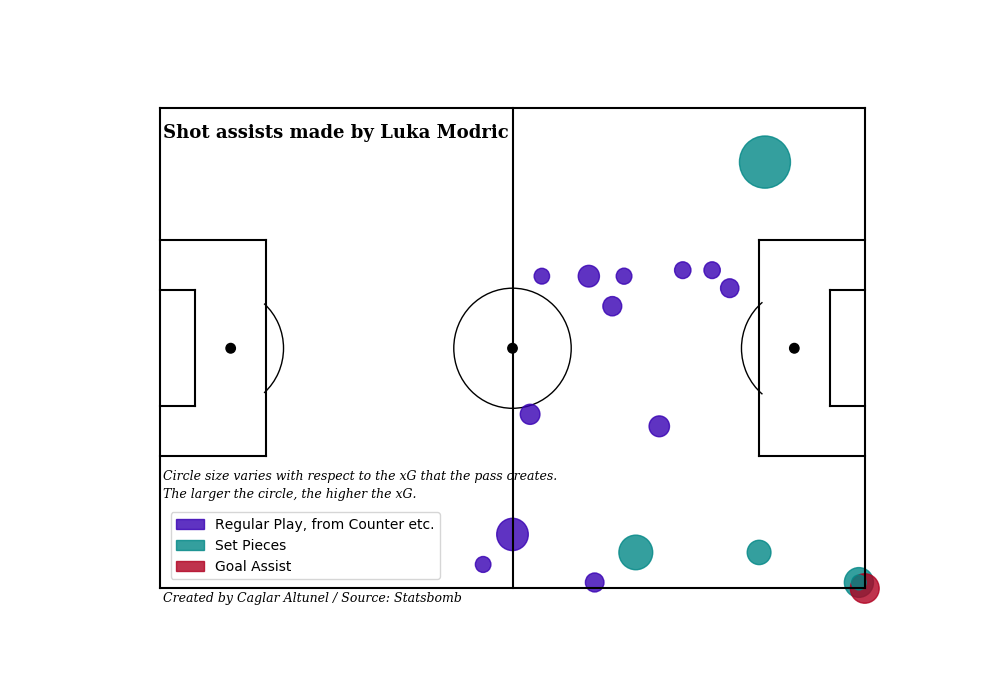

In [ ]:
pitchLengthX=120
pitchWidthY=80
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','black')

for i,shotpass in dfluka.iterrows():
    x=shotpass['location'][0]
    y=shotpass['location'][1]
    
    goal=shotpass['shot_outcome_name']=='Goal'
    setpieces=shotpass['pass_type_name']=='Free Kick' or shotpass['pass_type_name']=='Corner'
    
    circleSize=np.sqrt(shotpass['shot_statsbomb_xg']*100)
    if setpieces:
        if goal:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="#B00020", label='Goal Assist')
            shotCircle.set_alpha(.8)
        else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="#018786", label='Set Pieces')
            shotCircle.set_alpha(.8)
    else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="#3700B3", label='Regular Play, from Counter etc.')     
            shotCircle.set_alpha(.8)
    ax.add_patch(shotCircle)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc=3, bbox_to_anchor=(0.05, 0.05))
plt.text(0.5,75,'Shot assists made by Luka Modric', fontsize=13, fontfamily='serif', fontweight='bold')
plt.text(0.5,18,'Circle size varies with respect to the xG that the pass creates.', fontsize=9, fontfamily='serif', style='italic')
plt.text(0.5,15,'The larger the circle, the higher the xG.', fontsize=9, fontfamily='serif', style='italic') 
plt.text(0.5,-2.2,'Created by Caglar Altunel / Source: Statsbomb', fontsize=9, fontfamily='serif', style='italic') 
fig.set_size_inches(10, 7)
fig.savefig('LukaModric.png', dpi=100) 
plt.show()

Same process is iterated by Paul Pogba. The outcome and the code can be seen in the below:
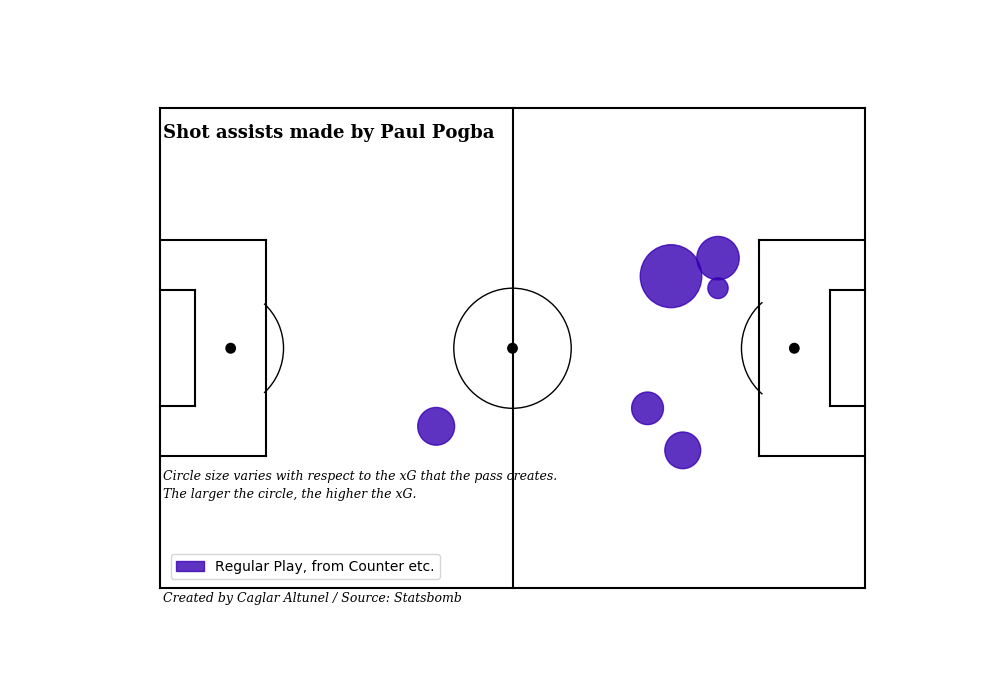
#### And the code:

In [ ]:
with open('Statsbomb/data/events/'+file_name_p[0], errors='ignore') as f:
    data0p= json.load(f)
with open('Statsbomb/data/events/'+file_name_p[1], errors='ignore') as f:
    data1p= json.load(f)
with open('Statsbomb/data/events/'+file_name_p[2], errors='ignore') as f:
    data2p= json.load(f)
with open('Statsbomb/data/events/'+file_name_p[3], errors='ignore') as f:
    data3p= json.load(f)
with open('Statsbomb/data/events/'+file_name_p[4], errors='ignore') as f:
    data4p= json.load(f)
with open('Statsbomb/data/events/'+file_name_p[5], errors='ignore') as f:
    data5p= json.load(f)    
with open('Statsbomb/data/events/'+file_name_l[6], errors='ignore') as f:
    data6p= json.load(f)    

df0p = json_normalize(data0p, sep = "_").assign(match_id = file_name_p[0][:-5])
df1p = json_normalize(data1p, sep = "_").assign(match_id = file_name_p[1][:-5])
df2p = json_normalize(data2p, sep = "_").assign(match_id = file_name_p[2][:-5])
df3p = json_normalize(data3p, sep = "_").assign(match_id = file_name_p[3][:-5])
df4p = json_normalize(data4p, sep = "_").assign(match_id = file_name_p[4][:-5])
df5p = json_normalize(data5p, sep = "_").assign(match_id = file_name_p[5][:-5])
df6p = json_normalize(data6p, sep = "_").assign(match_id = file_name_p[6][:-5])

df0p['pass_successful'] = df0p["pass_outcome_name"].apply(lambda x: 1 if pd.isnull(x) else 0)
df1p['pass_successful'] = df1p["pass_outcome_name"].apply(lambda x: 1 if pd.isnull(x) else 0)
df2p['pass_successful'] = df2p["pass_outcome_name"].apply(lambda x: 1 if pd.isnull(x) else 0)
df3p['pass_successful'] = df3p["pass_outcome_name"].apply(lambda x: 1 if pd.isnull(x) else 0)
df4p['pass_successful'] = df4p["pass_outcome_name"].apply(lambda x: 1 if pd.isnull(x) else 0)
df5p['pass_successful'] = df5p["pass_outcome_name"].apply(lambda x: 1 if pd.isnull(x) else 0)
df6p['pass_successful'] = df6p["pass_outcome_name"].apply(lambda x: 1 if pd.isnull(x) else 0)

df0p['shot_goal_assist'] = df0p["pass_assisted_shot_id"].apply(lambda x: 0 if pd.isnull(x) else 1)
df1p['shot_goal_assist'] = df1p["pass_assisted_shot_id"].apply(lambda x: 0 if pd.isnull(x) else 1)
df2p['shot_goal_assist'] = df2p["pass_assisted_shot_id"].apply(lambda x: 0 if pd.isnull(x) else 1)
df3p['shot_goal_assist'] = df3p["pass_assisted_shot_id"].apply(lambda x: 0 if pd.isnull(x) else 1)
df4p['shot_goal_assist'] = df4p["pass_assisted_shot_id"].apply(lambda x: 0 if pd.isnull(x) else 1)
df5p['shot_goal_assist'] = df5p["pass_assisted_shot_id"].apply(lambda x: 0 if pd.isnull(x) else 1)
df6p['shot_goal_assist'] = df6p["pass_assisted_shot_id"].apply(lambda x: 0 if pd.isnull(x) else 1)

df00p = df0p.loc[(df0p['shot_goal_assist'] == 1)].drop(columns=['id'])
df11p = df1p.loc[(df1p['shot_goal_assist'] == 1)].drop(columns=['id'])
df22p = df2p.loc[(df2p['shot_goal_assist'] == 1)].drop(columns=['id'])
df33p = df3p.loc[(df3p['shot_goal_assist'] == 1)].drop(columns=['id'])
df44p = df4p.loc[(df4p['shot_goal_assist'] == 1)].drop(columns=['id'])
df55p = df5p.loc[(df5p['shot_goal_assist'] == 1)].drop(columns=['id'])
df66p = df6p.loc[(df6p['shot_goal_assist'] == 1)].drop(columns=['id'])

df00p = df00p.rename(columns={'pass_assisted_shot_id': 'id'})
df11p = df11p.rename(columns={'pass_assisted_shot_id': 'id'})
df22p = df22p.rename(columns={'pass_assisted_shot_id': 'id'})
df33p = df33p.rename(columns={'pass_assisted_shot_id': 'id'})
df44p = df44p.rename(columns={'pass_assisted_shot_id': 'id'})
df55p = df55p.rename(columns={'pass_assisted_shot_id': 'id'})
df66p = df66p.rename(columns={'pass_assisted_shot_id': 'id'})

df00p = df00p.drop(columns=['shot_statsbomb_xg', 'shot_outcome_name'])
df11p = df11p.drop(columns=['shot_statsbomb_xg', 'shot_outcome_name'])
df22p = df22p.drop(columns=['shot_statsbomb_xg', 'shot_outcome_name'])
df33p = df33p.drop(columns=['shot_statsbomb_xg', 'shot_outcome_name'])
df44p = df44p.drop(columns=['shot_statsbomb_xg', 'shot_outcome_name'])
df55p = df55p.drop(columns=['shot_statsbomb_xg', 'shot_outcome_name'])
df66p = df66p.drop(columns=['shot_statsbomb_xg', 'shot_outcome_name'])

df0p = df0p.set_index('id')
df1p = df1p.set_index('id')
df2p = df2p.set_index('id')
df3p = df3p.set_index('id')
df4p = df4p.set_index('id')
df5p = df5p.set_index('id')
df6p = df6p.set_index('id')

df000p = df0p[['shot_statsbomb_xg', 'shot_outcome_name']].reset_index()
df111p = df1p[['shot_statsbomb_xg', 'shot_outcome_name']].reset_index()
df222p = df2p[['shot_statsbomb_xg', 'shot_outcome_name']].reset_index()
df333p = df3p[['shot_statsbomb_xg', 'shot_outcome_name']].reset_index()
df444p = df4p[['shot_statsbomb_xg', 'shot_outcome_name']].reset_index()
df555p = df5p[['shot_statsbomb_xg', 'shot_outcome_name']].reset_index()
df666p = df6p[['shot_statsbomb_xg', 'shot_outcome_name']].reset_index()

df000p = df000p.dropna()
df111p = df111p.dropna()
df222p = df222p.dropna()
df333p = df333p.dropna()
df444p = df444p.dropna()
df555p = df555p.dropna()
df666p = df666p.dropna()

df0_fp = df00p.merge(df000p, how='left', on=['id'])
df1_fp = df11p.merge(df111p, how='left', on=['id'])
df2_fp = df22p.merge(df222p, how='left', on=['id'])
df3_fp = df33p.merge(df333p, how='left', on=['id'])
df4_fp = df44p.merge(df444p, how='left', on=['id'])
df5_fp = df55p.merge(df555p, how='left', on=['id'])
df6_fp = df66p.merge(df666p, how='left', on=['id']) 

df0_fp = df0_fp.loc[(df0_fp['player_name'] == 'Paul Pogba')].copy()
df1_fp = df1_fp.loc[(df1_fp['player_name'] == 'Paul Pogba')].copy()
df2_fp = df2_fp.loc[(df2_fp['player_name'] == 'Paul Pogba')].copy()
df3_fp = df3_fp.loc[(df3_fp['player_name'] == 'Paul Pogba')].copy()
df4_fp = df4_fp.loc[(df4_fp['player_name'] == 'Paul Pogba')].copy()
df5_fp = df5_fp.loc[(df5_fp['player_name'] == 'Paul Pogba')].copy()
df6_fp = df6_fp.loc[(df6_fp['player_name'] == 'Paul Pogba')].copy()

dfmerge1p = df0_fp.append(df1_fp)
dfmerge2p = dfmerge1p.append(df2_fp)
dfmerge3p = dfmerge2p.append(df3_fp)
dfmerge4p = dfmerge3p.append(df4_fp)
dfmerge5p = dfmerge4p.append(df5_fp)
dfpaul = dfmerge5p.append(df6_fp)

dfpaul = dfpaul.set_index('id')


In [ ]:
#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','black')

for i,shotpass in dfpaul.iterrows():
    x=shotpass['location'][0]
    y=shotpass['location'][1]
    
    goal=shotpass['shot_outcome_name']=='Goal'
    setpieces=shotpass['pass_type_name']=='Free Kick' or shotpass['pass_type_name']=='Corner'
    
    circleSize=np.sqrt(shotpass['shot_statsbomb_xg']*100)
    if setpieces:
        if goal:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="#B00020", label='Goal Assist')
            shotCircle.set_alpha(.8)
        else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="#018786", label='Set Pieces')
            shotCircle.set_alpha(.8)
    else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="#3700B3", label='Regular Play, from Counter etc.')     
            shotCircle.set_alpha(.8)
    ax.add_patch(shotCircle)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc=3, bbox_to_anchor=(0.05, 0.05))
plt.text(0.5,75,'Shot assists made by Paul Pogba', fontsize=13, fontfamily='serif', fontweight='bold')
plt.text(0.5,18,'Circle size varies with respect to the xG that the pass creates.', fontsize=9, fontfamily='serif', style='italic')
plt.text(0.5,15,'The larger the circle, the higher the xG.', fontsize=9, fontfamily='serif', style='italic') 
plt.text(0.5,-2.2,'Created by Caglar Altunel / Source: Statsbomb', fontsize=9, fontfamily='serif', style='italic') 
fig.set_size_inches(10, 7)
fig.savefig('PaulPogbafinal.png', dpi=100) 
plt.show()